# Forecasting with Facebook's Prophet

This notebook shows how to use the [Prophet-algorithm](https://facebook.github.io/prophet/) developed by Facebook for forecasting time series.

In [ ]:
# First install the required packages
!pip install pandas pystan matplotlib
!pip install fbprophet

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.plot import plot_yearly

## Read the data

In [30]:
df = pd.read_csv("data/GlobalTemperatures.csv", parse_dates=[0])
df = df[["dt", "LandAverageTemperature"]]
df["LandAverageTemperature"] = df["LandAverageTemperature"].interpolate()

In [31]:
df.rename(columns={"dt":"ds", "LandAverageTemperature": "y"}, inplace=True)

## Split data by percentage

In [78]:
split_percentage = 80
train_size = int(df.shape[0]*(split_percentage/100))
train, test = df[:train_size], df[train_size:]

## Create model and predict future

In [87]:
m = Prophet()
m.fit(train)

future = m.make_future_dataframe(periods=len(test)+1, freq='m', include_history=False)
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,yhat,yhat_lower,yhat_upper
635,2015-08-31,12.797079,11.677862,14.044220
636,2015-09-30,10.403715,9.112078,11.612158
637,2015-10-31,6.404978,5.277403,7.581737
638,2015-11-30,4.220793,2.963257,5.403963
639,2015-12-31,3.097171,1.889019,4.350749


## Plot the results

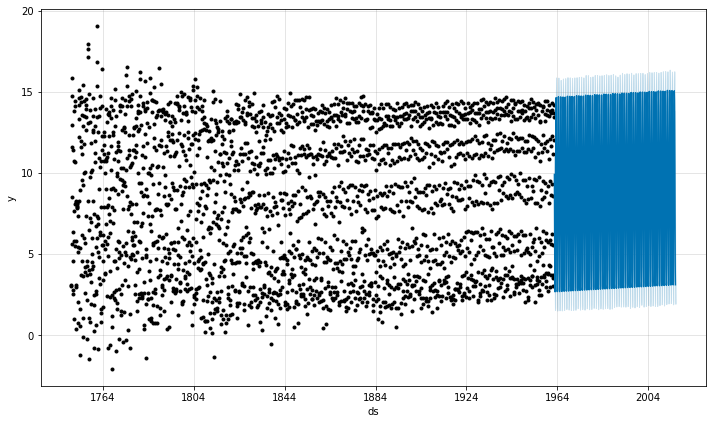

In [85]:
fig1 = m.plot(forecast)

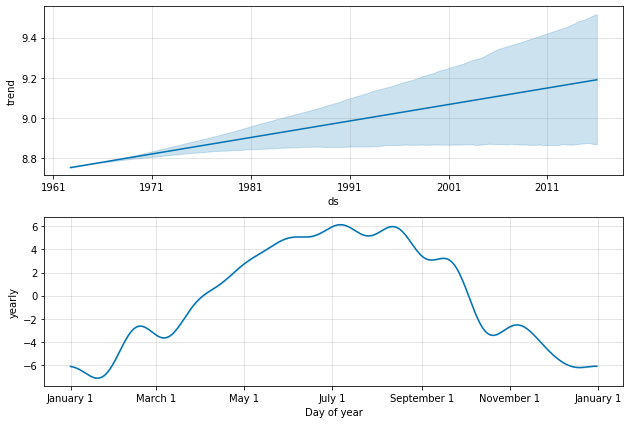

In [86]:
fig2 = m.plot_components(forecast)

Especially the last trend plot shows how the average temperature rose the past years.

## Split data by year

In [88]:
train_start_date = '1900-01-01'
train_end_date = '1999-12-01'
test_start_date = '2000-01-01'
test_end_date = '2015-12-01'

train = df[(df["ds"] >= train_start_date) & (df["ds"] <= train_end_date)]
test = df[(df["ds"] >= test_start_date) & (df["ds"] <= test_end_date)]

## Create model and predict future

In [89]:
m = Prophet()
m.fit(train)

future = m.make_future_dataframe(periods=len(test)+1, freq='m', include_history=False)
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,yhat,yhat_lower,yhat_upper
188,2015-08-31,13.183082,12.762133,13.612796
189,2015-09-30,10.683178,10.259379,11.101987
190,2015-10-31,7.143251,6.748653,7.575937
191,2015-11-30,4.828418,4.415568,5.261541
192,2015-12-31,3.825875,3.425469,4.271024


## Create model and predict future

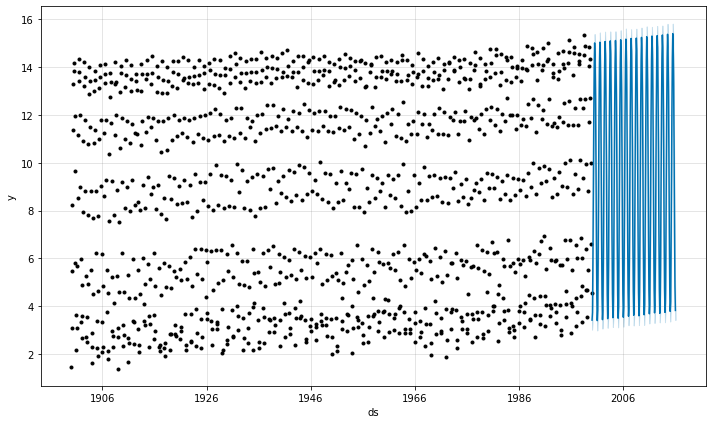

In [90]:
fig1 = m.plot(forecast)

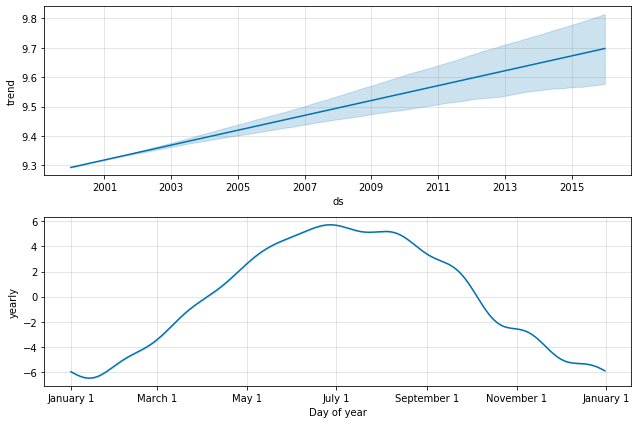

In [91]:
fig2 = m.plot_components(forecast)

The last trend plot shows again how the average temperature rose the past years.